<a href="https://colab.research.google.com/github/Nannanpeng/Econ_Dynamic_Programming/blob/master/AR1_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import numba as nb
from scipy.stats import norm
from scipy.special import factorial2

## Exercise 1

In [86]:
a, b, c = 0.9, 0.1, 0.5

mu, v = -3.0, 0.6  # initial conditions mu_0, v_0

mu_star = b / (1 - a)
std_star = np.sqrt(c**2 / (1 - a**2))  # square root of v_star

In [87]:
def M_k(k, std):
  if k%2 == 0:
    return std**k * factorial2(k-1)
  return 0

In [88]:
def Simulation(n_sim, a, b, c, mu, v):
  mus, vs = [], []
  for _ in range(n_sim):
    mu = a * mu + b
    mus.append(mu)
    v = a**2 * v + c**2
    vs.append(v)
  return sy.stats.norm.rvs(mus, np.sqrt(vs), random_state = 88)

def SimM_k(sims, u_star, k):
  return np.mean((sims - u_star)**k)

In [89]:
sims = Simulation(100000, a, b, c, mu, v)
for k in range(1, 10):
  print(SimM_k(sims, mu_star, k), M_k(k, std_star))

0.006033411858661991 0
1.313204311805997 1.3157894736842108
0.033011003083514116 0
5.184813568909038 5.193905817174519
0.38409895627904916 0
34.39737647025372 34.17043300772711
6.228397745036922 0
324.04287909026334 314.72767243959186
118.80272945052603 0


## Exercise 2

In [55]:
from scipy.stats import iqr
from scipy.stats import beta
import matplotlib.pyplot as plt


class KDE:
  def __init__(self, X, h=None):
    self.X = X
    self.n = len(X)
    m = 0.9 * min(X.std(), iqr(X)/1.34)*pow(self.n, -1/5)
    self.h = m if h==None else h
  
  def Density(self, x):
    scale_x = (x - self.X)/self.h
    return np.sum(norm.pdf(scale_x))/(self.h*self.n)

def sim_samples(alpha_, beta_, size=500):
  return beta.rvs(a=alpha_, b=beta_, size=size, random_state=88)

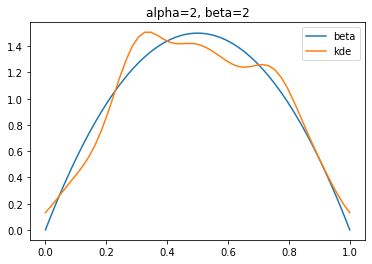

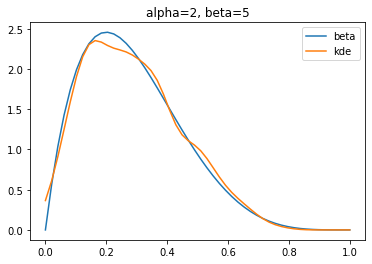

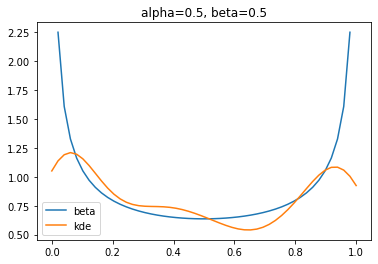

In [64]:
x = np.linspace(0, 1, 50)
params = [[2, 2], [2, 5], [0.5, 0.5]]
for alpha_, beta_ in params:
  X = sim_samples(alpha_, beta_)
  kde = KDE(X)
  beta_pdf = beta.pdf(x, a=alpha_, b=beta_)
  kde_pdf = [kde.Density(x_) for x_ in x]
  _, ax = plt.subplots(1, 1)
  ax.plot(x, beta_pdf, label='beta')
  ax.plot(x, kde_pdf, label='kde')
  ax.set_title(f"alpha={alpha_}, beta={beta_}")
  ax.legend(loc='best')

## Exercise 3

In [93]:
a, b, c = 0.9, 0, 0.1
u, s = -3, 0.2

u_plus = a*u + b
s_plus = np.sqrt(pow(a*s, 2) + c**2)
n = 2000

In [94]:
n_draws = norm.rvs(u, s, size = n, random_state=88)
n_noise = norm.rvs(size=n, random_state=88)
n_draws_up = a*n_draws + b + c*n_noise

kde = KDE(n_draws_up)

In [95]:
x = np.linspace(-4, -2, 500)
density = norm.pdf(x, u, s)
density_up = norm.pdf(x, u_plus, s_plus)
density_kde = [kde.Density(x_) for x_ in x]

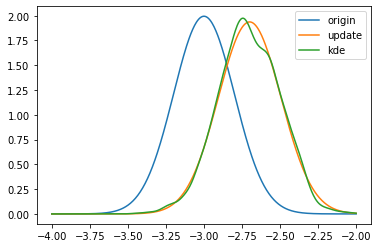

In [97]:
for y, label in zip([density, density_up, density_kde],
            ['origin', 'update', 'kde']):
  plt.plot(x, y, label = label)
  plt.legend(loc='best')